In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow .keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [2]:
train= ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [3]:
train_data = train.flow_from_directory('satellite_data/train',
                                       batch_size = 3,
                                      class_mode = 'binary')

validation_data = validation.flow_from_directory('satellite_data/Validation',
                                      batch_size = 3,
                                      class_mode = 'binary')




Found 202 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [4]:
train_data.class_indices

{'Good_Period_for_Planting': 0, 'Not_Good_Period_for_Planting': 1}

In [5]:
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu",input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
hist = model.fit(train_data, epochs=150, validation_data = validation_data)

Epoch 1/150
68/68 [==============================] - 10s 148ms/step - loss: 3.0455e-04 - accuracy: 1.0000 - val_loss: 0.9063 - val_accuracy: 0.9062
Epoch 2/150
68/68 [==============================] - 10s 146ms/step - loss: 4.7991e-04 - accuracy: 1.0000 - val_loss: 0.9448 - val_accuracy: 0.9062
Epoch 3/150
68/68 [==============================] - 10s 146ms/step - loss: 1.0938e-04 - accuracy: 1.0000 - val_loss: 0.9502 - val_accuracy: 0.9062
Epoch 4/150
68/68 [==============================] - 10s 141ms/step - loss: 1.8561e-04 - accuracy: 1.0000 - val_loss: 0.9721 - val_accuracy: 0.9062
Epoch 5/150
68/68 [==============================] - 10s 144ms/step - loss: 2.7122e-04 - accuracy: 1.0000 - val_loss: 1.0006 - val_accuracy: 0.8958
Epoch 6/150
68/68 [==============================] - 10s 148ms/step - loss: 1.1630e-04 - accuracy: 1.0000 - val_loss: 1.0313 - val_accuracy: 0.8958
Epoch 7/150
68/68 [==============================] - 10s 147ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss

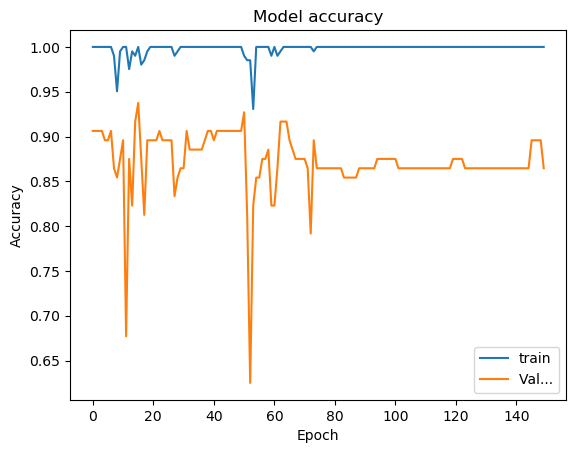

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'Val...'], loc='lower right')
plt.show()

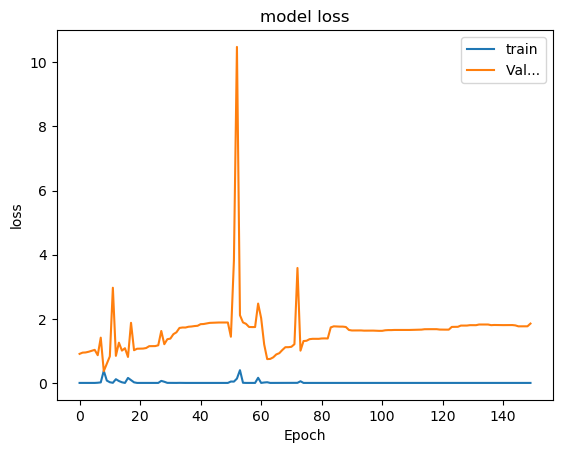

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','Val...'],loc='upper right')
plt.show()

In [33]:
validation_data.class_indices

{'Good_Period_for_Planting': 0, 'Not_Good_Period_for _Planting': 1}

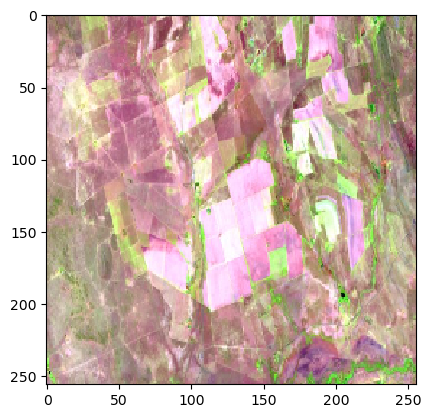

1/1 [==============================] - 0s 125ms/step
Good time for planting


In [36]:
dir_path = 'satellite_data/Testing'

for i in os.listdir(dir_path):
    imge = image.load_img(dir_path+'//' + i,target_size=(256,256))
    plt.imshow(imge)
    plt.show()
    
    x = image.img_to_array(imge)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    if val ==0:
        print('Not good time for Planting')
    else:
        print('Good time for planting')

